# 이동평균선을 활용한 매매
- 종가 이동평균선 window size가 작은 것 -> 빠르게 움직인다. (빠른선)
- 종가 이동평균선 window size가 큰 것 -> 느리게 움직인다. (느린선)
- 종가 빠른선 -> 느린선을 상향 돌파했다. ->


In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
df = fdr.DataReader('MSFT', '2020')[['Close']]
df.head()

,Close
Date,
2020-01-02,160.619995
2020-01-03,158.619995
2020-01-06,159.029999
2020-01-07,157.580002
2020-01-08,160.089996


In [2]:
fast_window_size = 50
slow_window_size = 200
df['MA_fast'] = df['Close'].rolling(fast_window_size, min_periods = 1).mean()
df['MA_slow'] = df['Close'].rolling(slow_window_size, min_periods = 1).mean()
df.head()

,Close,MA_fast,MA_slow
Date,,,
2020-01-02,160.619995,160.619995,160.619995
2020-01-03,158.619995,159.619995,159.619995
2020-01-06,159.029999,159.423330,159.423330
2020-01-07,157.580002,158.962498,158.962498
2020-01-08,160.089996,159.187997,159.187997


<Axes: xlabel='Date'>

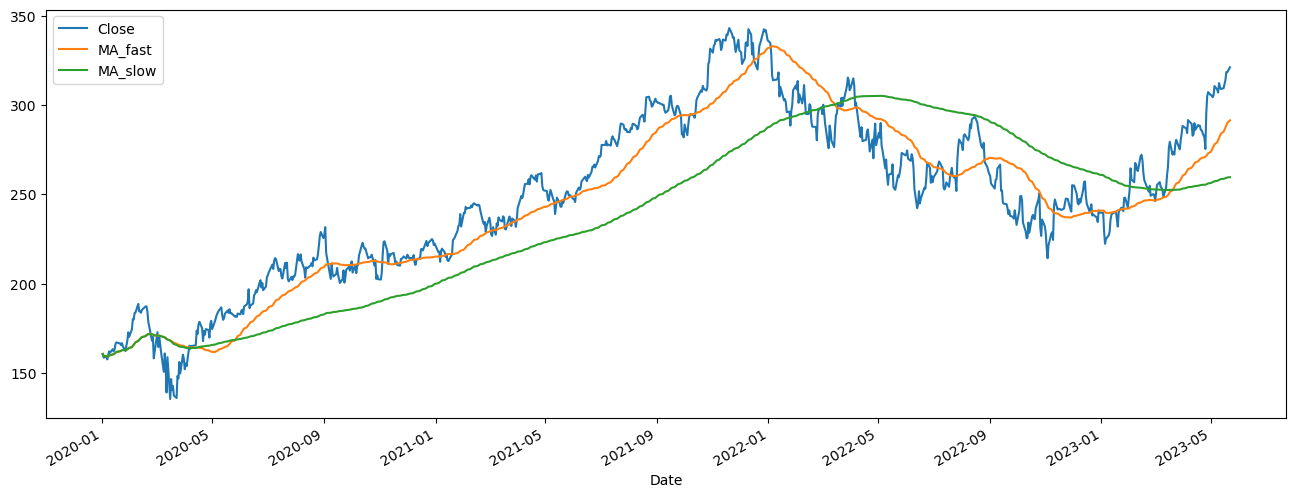

In [3]:
# 종가 빠른선 -> 느린선을 상향 돌파했다. => 상승 추세
# 종가 빠른선 -> 느린선을 하향 돌파했다. => 하향 추세
df.plot(figsize = (16, 6))

In [4]:
df['is_hold'] = np.where(df['MA_fast'] >= df['MA_slow'], True, False)

In [5]:
df.head()

,Close,MA_fast,MA_slow,is_hold
Date,,,,
2020-01-02,160.619995,160.619995,160.619995,True
2020-01-03,158.619995,159.619995,159.619995,True
2020-01-06,159.029999,159.423330,159.423330,True
2020-01-07,157.580002,158.962498,158.962498,True
2020-01-08,160.089996,159.187997,159.187997,True


In [6]:
# 매수신호 -> 다음날 매수
df['NextDay_Close'] = df['Close'].shift(-1)
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close
Date,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995
2020-01-03,158.619995,159.619995,159.619995,True,159.029999
2020-01-06,159.029999,159.423330,159.423330,True,157.580002
2020-01-07,157.580002,158.962498,158.962498,True,160.089996
2020-01-08,160.089996,159.187997,159.187997,True,162.089996


In [7]:
df['return'] = np.where(df['is_hold']==True, df['NextDay_Close'] - df['Close'] , None)
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return
Date,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0


In [8]:
df['cum_return'] = df['return'].cumsum()
df.tail()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2023-05-16,311.739990,286.187800,258.86390,True,314.000000,2.26001,156.820007
2023-05-17,314.000000,287.384800,259.04385,True,318.519989,4.519989,161.339996
2023-05-18,318.519989,288.681200,259.26235,True,318.339996,-0.179993,161.160003
2023-05-19,318.339996,290.001599,259.44170,True,321.179993,2.839997,164.0
2023-05-22,321.179993,291.453399,259.62935,True,NaN,NaN,NaN


In [9]:
df[df['is_hold'] == True]

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001
...,...,...,...,...,...,...,...
2023-05-16,311.739990,286.187800,258.863900,True,314.000000,2.26001,156.820007
2023-05-17,314.000000,287.384800,259.043850,True,318.519989,4.519989,161.339996
2023-05-18,318.519989,288.681200,259.262350,True,318.339996,-0.179993,161.160003


### 이동평균 매매 시각화

In [10]:
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001


In [11]:
# 매수, 신호가 온 날짜 
# 매수 신호 : 빠른선 -> 느린선을 상향돌파
# 매도 신호 : 빠른선 -> 느린선을 하향돌파
# 정확한 돌파 시점을 구하는 로직 [10min/12시 38분까지]

In [12]:
# 돌파 시점은 결국 빠른선 - 느린선 (차이)가 양수에서 음수 또는 음수에서 양수로 변하는 시점 이라 생각하고 for문으로 돌려보려 했으나 실패했습니다

In [13]:
test = df.copy()

In [14]:
test['MA_diff']  = test['MA_fast'] - test['MA_slow']
test.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff
Date,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0


In [15]:
test['Check'] = np.where(test['MA_diff'] > 0, 'pos', 'neg')
test.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check
Date,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0,neg
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0,neg
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0,neg
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0,neg
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0,neg


In [16]:
signal_date = test[test['Check'] != test['Check'].shift(1)].index
signal_date

DatetimeIndex(['2020-01-02', '2020-03-16', '2020-04-15', '2020-05-27',
               '2022-03-15', '2023-03-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
# signal_date = test[test['Check'] != test['Check'].shift(1)].index
test.loc[signal_date, 'signal'] = True
test.head(5)

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check,signal
Date,,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0,neg,True
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0,neg,NaN
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0,neg,NaN
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0,neg,NaN
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0,neg,NaN


In [18]:
# 알고있는 정보 : 매수, 매도 신호가 온 날 -> 매수? 매도?
test['SELL'] = np.where((test['Check'] == 'neg') & (test['signal'] == True), True, None)
test['BUY'] = np.where((test['Check'] == 'pos') & (test['signal'] == True), True, None)
test.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check,signal,SELL,BUY
Date,,,,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0,neg,True,True,None
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0,neg,NaN,None,None
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0,neg,NaN,None,None
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0,neg,NaN,None,None
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0,neg,NaN,None,None


In [19]:
BUY_DATE = test[test['BUY'] == True].index
SELL_DATE = test[test['SELL'] == True].index

In [20]:
test['cum_return'] = test['cum_return'].fillna(method = 'ffill')

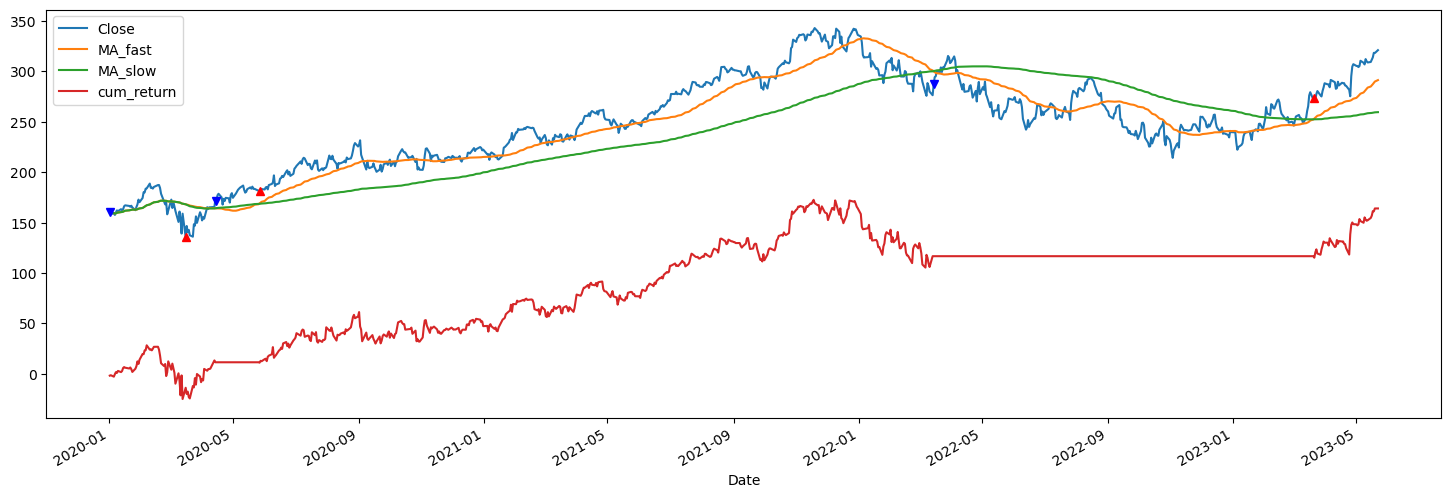

In [21]:
import matplotlib.pyplot as plt
test[['Close', 'MA_fast', 'MA_slow','cum_return']].plot(figsize = (18,6))
plt.plot(BUY_DATE, test.loc[BUY_DATE, 'Close'], 'r^')
plt.plot(SELL_DATE, test.loc[SELL_DATE, 'Close'], 'bv')